In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate

In [25]:
def gaussian(wave, wave0, flux, sigma):
    return flux*np.exp(-(wave-wave0)**2/2/sigma**2)/(2*math.pi*sigma**2)**.5

def compute(total_flux, wave, fwhm):
#takes as input the total flux, wavelength array, line FWHM   
    ratios=np.genfromtxt("ratios_10.dat")
    waves0, intensities, references=ratios[:,0], ratios[:,1], ratios[:,2]
    intensities=intensities*references
    intensities=intensities/np.sum(intensities)
    
    spectrum=np.zeros(len(wave))
    for i in range(len(ratios)):
        spectrum=spectrum+gaussian(wave, waves0[i], total_flux*intensities[i], fwhm/2.355)    
        
    return spectrum    

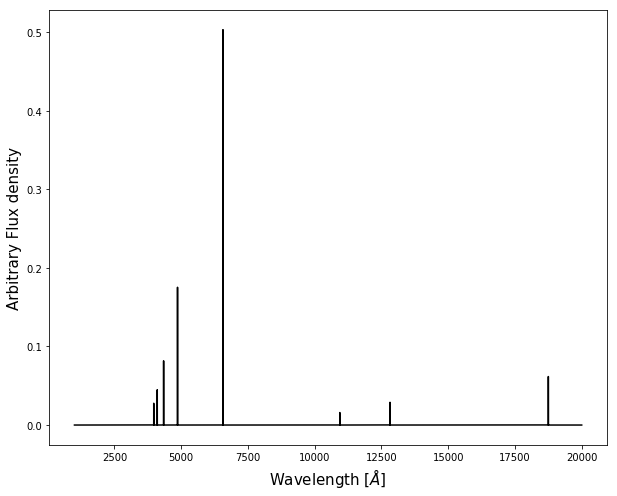

0.9999999999999999


In [26]:
#wavelength array
wave=np.arange(1000, 20000, .1)

spectrum=compute(1, wave, 1)

fig, axarr=plt.subplots(1,1, figsize=(10,8))
axarr.plot(wave, spectrum, color='black')
axarr.set_xlabel('Wavelength [$\AA$]', fontsize=15)
axarr.set_ylabel('Arbitrary Flux density', fontsize=15)
plt.show()

print(scipy.integrate.simps(spectrum, wave))